In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset
dataset = load_dataset("paws", "labeled_final")

Generating train split:   0%|          | 0/49401 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8000 [00:00<?, ? examples/s]

In [4]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]
val_dataset = dataset["validation"]

In [5]:
# Convert the dataset to a pandas dataframe
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)
val_df = pd.DataFrame(val_dataset)

print(train_df.head())

   id                                          sentence1  \
0   1  In Paris , in October 1560 , he secretly met t...   
1   2  The NBA season of 1975 -- 76 was the 30th seas...   
2   3  There are also specific discussions , public p...   
3   4  When comparable rates of flow can be maintaine...   
4   5  It is the seat of Zerendi District in Akmola R...   

                                           sentence2  label  
0  In October 1560 , he secretly met with the Eng...      0  
1  The 1975 -- 76 season of the National Basketba...      1  
2  There are also public discussions , profile sp...      0  
3  The results are high when comparable flow rate...      1  
4  It is the seat of the district of Zerendi in A...      1  


In [6]:
# Print number of samples in each dataset
print("Number of training samples: {}".format(len(train_df)))
print("Number of testing samples: {}".format(len(test_df)))
print("Number of validation samples: {}".format(len(val_df)))

Number of training samples: 49401
Number of testing samples: 8000
Number of validation samples: 8000


### Lexical Overlap

In [43]:
lemmatizer = WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

In [46]:
# Function to calculate lexical overlap
def lexical_overlap(sentence1, sentence2):
    sentence1 = word_tokenize(sentence1)
    sentence2 = word_tokenize(sentence2)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    sentence1 = [w for w in sentence1 if not w in stop_words]
    sentence2 = [w for w in sentence2 if not w in stop_words]

    # Remove punctuation
    sentence1 = [w for w in sentence1 if w.isalpha()]
    sentence2 = [w for w in sentence2 if w.isalpha()]

    # lemmatize
    sentence1 = [lemmatizer.lemmatize(w) for w in sentence1]
    sentence2 = [lemmatizer.lemmatize(w) for w in sentence2]

    # Stemming
    sentence1 = [stemmer.stem(w) for w in sentence1]
    sentence2 = [stemmer.stem(w) for w in sentence2]

    overlap = len(set(sentence1).intersection(sentence2))
    # print(overlap)

    # Divide by number of unique words in both sentences
    unique = set(sentence1).union(set(sentence2))
    # print(len(unique))
    out = overlap / len(unique)
    # Round to 3 decimal places
    out = round(out, 3)
    return out
    

In [47]:
# Example
# print(lexical_overlap("I like cats", "I like dogs"))
print(lexical_overlap(train_df["sentence1"][0], train_df["sentence2"][0]))

1.0


In [48]:
# Function to calculate lexical overlap for a dataframe
def lexical_overlap_df(df):
    overlap = []
    for _, row in df.iterrows():
        overlap.append(lexical_overlap(row["sentence1"], row["sentence2"]))
    
    # Take the mean of the overlap
    obj = np.array(overlap)
    out = np.mean(obj)
    return out

In [49]:
# Call the function on all three datasets
train_overlap = lexical_overlap_df(train_df)
test_overlap = lexical_overlap_df(test_df)
val_overlap = lexical_overlap_df(val_df)

In [51]:
# Format to .6f

print("Training overlap: {:.6f}".format(train_overlap))
print("Testing overlap: {:.6f}".format(test_overlap))
print("Validation overlap: {:.6f}".format(val_overlap))

Training overlap: 0.889283

Testing overlap: 0.888308

Validation overlap: 0.890231


### Label Distribution

In [54]:
# Function to plot label distribution
def plot_label_dist(df, title):
    df["label"].value_counts().plot(kind="bar")
    plt.title(title)
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

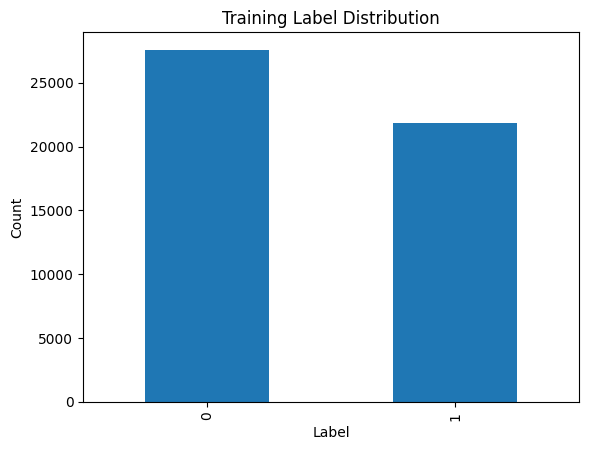

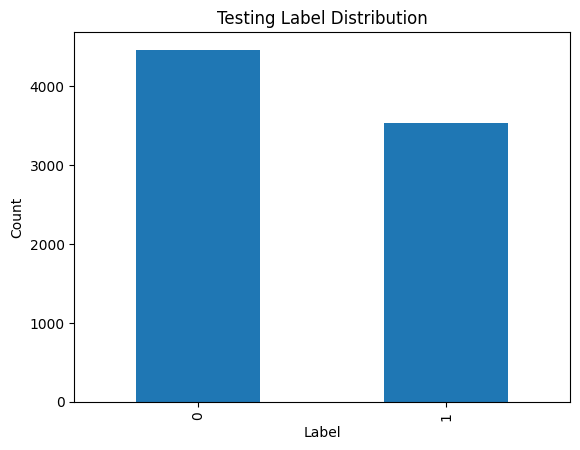

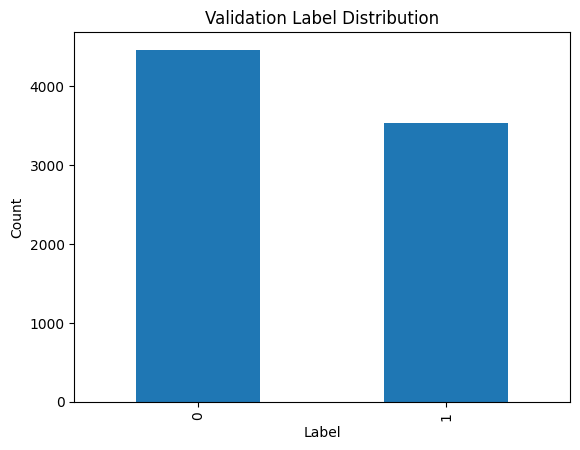

In [55]:
# Plot the label distribution for all three datasets

plot_label_dist(train_df, "Training Label Distribution")
plot_label_dist(test_df, "Testing Label Distribution")
plot_label_dist(val_df, "Validation Label Distribution")